In [ ]:
!pip install geopandas

     |████████████████████████████████| 972kB 4.9MB/s 
     |████████████████████████████████| 6.5MB 14.9MB/s 
     |████████████████████████████████| 14.8MB 313kB/s 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import geopandas as gpd


In [ ]:
#fonte: https://www.kaggle.com/unanimad/us-election-2020?select=president_county_candidate.csv
#fonte: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/VOQCHQ
#fonte: https://www.kaggle.com/muonneutrino/us-census-demographic-data
#fonte: https://www.census.gov/geographies/reference-files/time-series/geo/gazetteer-files.html

In [ ]:
df_presidentes = pd.read_csv('president_county_candidate.csv')
df_presidentes = df_presidentes[df_presidentes['candidate'].isin(['Donald Trump', 'Joe Biden'])]
df_presidentes.head()

,state,county,candidate,party,total_votes,won
0,Delaware,Kent County,Joe Biden,DEM,44552,True
1,Delaware,Kent County,Donald Trump,REP,41009,False
4,Delaware,New Castle County,Joe Biden,DEM,195034,True
5,Delaware,New Castle County,Donald Trump,REP,88364,False
8,Delaware,Sussex County,Donald Trump,REP,71230,True


In [ ]:
#ordenando os estados e condados por ordem alfabética para deixar tudo dps na mesma ordem e facilitar alguma iteração
df_presidentes =  df_presidentes.sort_values(['state','county'], ascending = True)
df_presidentes = df_presidentes.reset_index(drop=True)
df_presidentes

,state,county,candidate,party,total_votes,won
0,Alabama,Autauga County,Donald Trump,REP,19764,True
1,Alabama,Autauga County,Joe Biden,DEM,7450,False
2,Alabama,Baldwin County,Donald Trump,REP,83055,True
3,Alabama,Baldwin County,Joe Biden,DEM,24344,False
4,Alabama,Barbour County,Donald Trump,REP,5605,True
...,...,...,...,...,...,...
9261,Wyoming,Uinta County,Joe Biden,DEM,1591,False
9262,Wyoming,Washakie County,Donald Trump,REP,3245,True
9263,Wyoming,Washakie County,Joe Biden,DEM,651,False
9264,Wyoming,Weston County,Donald Trump,REP,3107,True


In [ ]:
# Aqui obtemos o total de votos e cada condado
#será usado para calcular o percentual de cada voto 
total_votos_condado = df_presidentes.groupby(['state','county'])['total_votes'].sum()
total_votos_condado

state    county           
Alabama  Autauga County        27214
         Baldwin County       107399
         Barbour County        10377
         Bibb County            9490
         Blount County         27222
                               ...  
Wyoming  Sweetwater County     16052
         Teton County          14189
         Uinta County           9087
         Washakie County        3896
         Weston County          3467
Name: total_votes, Length: 4633, dtype: int64

In [ ]:
#obtendo os totais de votos de cada condado
#obs: ordem igual a do dataframe
arr_est_cond = df_presidentes[['state','county']].values
lista_totais = []
for i in arr_est_cond:
    lista_totais.append(total_votos_condado[i[0],i[1]])

array_totais = np.array(lista_totais)
array_totais

array([ 27214,  27214, 107399, ...,   3896,   3467,   3467])

In [ ]:
#criando coluna de margem dos votos
df_presidentes['Share_of_votes(%)'] = df_presidentes['total_votes'] / array_totais *100
df_presidentes

,state,county,candidate,party,total_votes,won,Share_of_votes(%)
0,Alabama,Autauga County,Donald Trump,REP,19764,True,72.624385
1,Alabama,Autauga County,Joe Biden,DEM,7450,False,27.375615
2,Alabama,Baldwin County,Donald Trump,REP,83055,True,77.333122
3,Alabama,Baldwin County,Joe Biden,DEM,24344,False,22.666878
4,Alabama,Barbour County,Donald Trump,REP,5605,True,54.013684
...,...,...,...,...,...,...,...
9261,Wyoming,Uinta County,Joe Biden,DEM,1591,False,17.508529
9262,Wyoming,Washakie County,Donald Trump,REP,3245,True,83.290554
9263,Wyoming,Washakie County,Joe Biden,DEM,651,False,16.709446
9264,Wyoming,Weston County,Donald Trump,REP,3107,True,89.616383


In [ ]:
censo = pd.read_csv('/content/acs2015_county_data.csv')
censo

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,1.0,0.0,40725,51281.0,2391.0,24974,1080,12.9,18.6,33.2,17.0,24.2,8.6,17.1,87.5,8.8,0.1,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,0.7,0.0,147695,50254.0,1263.0,27317,711,13.4,19.2,33.1,17.7,27.1,10.8,11.2,84.7,8.8,0.1,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,0.4,0.0,20714,32964.0,2973.0,16824,798,26.7,45.3,26.8,16.1,23.1,10.8,23.1,83.8,10.9,0.4,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,0.1,0.0,17495,38678.0,3995.0,18431,1618,16.8,27.9,21.5,17.9,17.8,19.0,23.7,83.2,13.5,0.5,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,0.1,0.0,42345,45813.0,3141.0,20532,708,16.7,27.2,28.5,14.1,23.9,13.5,19.9,84.9,11.2,0.4,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,72145,Puerto Rico,Vega Baja,56858,27379,29479,96.4,3.4,0.1,0.0,0.0,0.0,43656,16948.0,1234.0,9102,538,48.5,56.1,30.1,21.6,24.7,9.2,14.3,89.1,7.1,0.9,1.2,1.3,0.3,32.0,13660,78.3,17.6,4.1,0.0,15.2
3216,72147,Puerto Rico,Vieques,9130,4585,4545,96.7,2.9,0.0,0.0,0.0,0.0,7085,18104.0,3771.0,8821,939,39.1,58.1,18.4,38.2,18.5,15.7,9.1,69.1,17.8,1.0,10.8,0.0,1.4,14.0,2860,44.5,41.6,13.6,0.3,12.2
3217,72149,Puerto Rico,Villalba,24685,12086,12599,99.7,0.0,0.0,0.0,0.0,0.0,18458,17818.0,1255.0,8420,486,54.0,68.3,23.6,21.0,21.8,13.9,19.7,82.0,11.4,0.1,3.2,0.0,3.3,26.9,6795,59.2,27.5,13.1,0.2,25.9
3218,72151,Puerto Rico,Yabucoa,36279,17648,18631,99.8,0.2,0.0,0.0,0.1,0.0,27924,15627.0,1836.0,7960,512,52.3,62.1,25.9,25.9,20.7,12.8,14.7,86.0,7.9,0.0,2.3,2.3,1.5,29.5,8083,65.1,27.6,7.3,0.0,24.3


In [ ]:
pop_st_cond = censo.groupby(['State','County'], as_index= True)[['TotalPop','Men','Women','Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment']].sum()

pop_st_cond.info()
#pop_st_cond.loc[('Alabama','Autauga')]

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3220 entries, ('Alabama', 'Autauga') to ('Wyoming', 'Weston')
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TotalPop         3220 non-null   int64  
 1   Men              3220 non-null   int64  
 2   Women            3220 non-null   int64  
 3   Hispanic         3220 non-null   float64
 4   White            3220 non-null   float64
 5   Black            3220 non-null   float64
 6   Native           3220 non-null   float64
 7   Asian            3220 non-null   float64
 8   Pacific          3220 non-null   float64
 9   Citizen          3220 non-null   int64  
 10  Income           3220 non-null   float64
 11  IncomeErr        3220 non-null   float64
 12  IncomePerCap     3220 non-null   int64  
 13  IncomePerCapErr  3220 non-null   int64  
 14  Poverty          3220 non-null   float64
 15  ChildPoverty     3220 non-null   float64
 16  Professional     3220 

In [ ]:
df_presidentes.rename(columns={'state':'State','county':'County'}, inplace = True)
df_presidentes

,State,County,candidate,party,total_votes,won,Share_of_votes(%)
0,Alabama,Autauga County,Donald Trump,REP,19764,True,72.624385
1,Alabama,Autauga County,Joe Biden,DEM,7450,False,27.375615
2,Alabama,Baldwin County,Donald Trump,REP,83055,True,77.333122
3,Alabama,Baldwin County,Joe Biden,DEM,24344,False,22.666878
4,Alabama,Barbour County,Donald Trump,REP,5605,True,54.013684
...,...,...,...,...,...,...,...
9261,Wyoming,Uinta County,Joe Biden,DEM,1591,False,17.508529
9262,Wyoming,Washakie County,Donald Trump,REP,3245,True,83.290554
9263,Wyoming,Washakie County,Joe Biden,DEM,651,False,16.709446
9264,Wyoming,Weston County,Donald Trump,REP,3107,True,89.616383


In [ ]:
df_presidentes

,State,County,candidate,party,total_votes,won,Share_of_votes(%)
0,Alabama,Autauga County,Donald Trump,REP,19764,True,72.624385
1,Alabama,Autauga County,Joe Biden,DEM,7450,False,27.375615
2,Alabama,Baldwin County,Donald Trump,REP,83055,True,77.333122
3,Alabama,Baldwin County,Joe Biden,DEM,24344,False,22.666878
4,Alabama,Barbour County,Donald Trump,REP,5605,True,54.013684
...,...,...,...,...,...,...,...
9261,Wyoming,Uinta County,Joe Biden,DEM,1591,False,17.508529
9262,Wyoming,Washakie County,Donald Trump,REP,3245,True,83.290554
9263,Wyoming,Washakie County,Joe Biden,DEM,651,False,16.709446
9264,Wyoming,Weston County,Donald Trump,REP,3107,True,89.616383


In [ ]:
#os nomes dos condados possuem um detalhe de diferença
#no df_presidentes eles possuem 'County' no Final
c = df_presidentes['County']
condados = []
for n in c:
    n = n.replace(' County','')
    condados.append(n)
condados =np.array(condados)

del df_presidentes['County']
df_presidentes.insert(1,'County',condados)
df_presidentes

,State,County,candidate,party,total_votes,won,Share_of_votes(%)
0,Alabama,Autauga,Donald Trump,REP,19764,True,72.624385
1,Alabama,Autauga,Joe Biden,DEM,7450,False,27.375615
2,Alabama,Baldwin,Donald Trump,REP,83055,True,77.333122
3,Alabama,Baldwin,Joe Biden,DEM,24344,False,22.666878
4,Alabama,Barbour,Donald Trump,REP,5605,True,54.013684
...,...,...,...,...,...,...,...
9261,Wyoming,Uinta,Joe Biden,DEM,1591,False,17.508529
9262,Wyoming,Washakie,Donald Trump,REP,3245,True,83.290554
9263,Wyoming,Washakie,Joe Biden,DEM,651,False,16.709446
9264,Wyoming,Weston,Donald Trump,REP,3107,True,89.616383


In [ ]:
df_presidentes = df_presidentes.fillna(0)
df_vencedor_condado = df_presidentes[df_presidentes['won'] == True]
df_vencedor_condado.pop('won')
df_vencedor_condado.reset_index(drop =True)
df_vencedor_condado

,State,County,candidate,party,total_votes,Share_of_votes(%)
0,Alabama,Autauga,Donald Trump,REP,19764,72.624385
2,Alabama,Baldwin,Donald Trump,REP,83055,77.333122
4,Alabama,Barbour,Donald Trump,REP,5605,54.013684
6,Alabama,Bibb,Donald Trump,REP,7508,79.114858
8,Alabama,Blount,Donald Trump,REP,24595,90.349717
...,...,...,...,...,...,...
9256,Wyoming,Sweetwater,Donald Trump,REP,12229,76.183653
9258,Wyoming,Teton,Joe Biden,DEM,9848,69.405878
9260,Wyoming,Uinta,Donald Trump,REP,7496,82.491471
9262,Wyoming,Washakie,Donald Trump,REP,3245,83.290554


In [ ]:
#Número de linhas entre df_vencedor_condado são diferentes
df_merged = df_vencedor_condado.merge(censo, on = ['State','County'], how = 'left')
del df_merged ['CensusId']
df_merged

,State,County,candidate,party,total_votes,Share_of_votes(%),TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,Alabama,Autauga,Donald Trump,REP,19764,72.624385,55221.0,26745.0,28476.0,2.6,75.8,18.5,0.4,1.0,0.0,40725.0,51281.0,2391.0,24974.0,1080.0,12.9,18.6,33.2,17.0,24.2,8.6,17.1,87.5,8.8,0.1,0.5,1.3,1.8,26.5,23986.0,73.6,20.9,5.5,0.0,7.6
1,Alabama,Baldwin,Donald Trump,REP,83055,77.333122,195121.0,95314.0,99807.0,4.5,83.1,9.5,0.6,0.7,0.0,147695.0,50254.0,1263.0,27317.0,711.0,13.4,19.2,33.1,17.7,27.1,10.8,11.2,84.7,8.8,0.1,1.0,1.4,3.9,26.4,85953.0,81.5,12.3,5.8,0.4,7.5
2,Alabama,Barbour,Donald Trump,REP,5605,54.013684,26932.0,14497.0,12435.0,4.6,46.2,46.7,0.2,0.4,0.0,20714.0,32964.0,2973.0,16824.0,798.0,26.7,45.3,26.8,16.1,23.1,10.8,23.1,83.8,10.9,0.4,1.8,1.5,1.6,24.1,8597.0,71.8,20.8,7.3,0.1,17.6
3,Alabama,Bibb,Donald Trump,REP,7508,79.114858,22604.0,12073.0,10531.0,2.2,74.5,21.4,0.4,0.1,0.0,17495.0,38678.0,3995.0,18431.0,1618.0,16.8,27.9,21.5,17.9,17.8,19.0,23.7,83.2,13.5,0.5,0.6,1.5,0.7,28.8,8294.0,76.8,16.1,6.7,0.4,8.3
4,Alabama,Blount,Donald Trump,REP,24595,90.349717,57710.0,28512.0,29198.0,8.6,87.9,1.5,0.3,0.1,0.0,42345.0,45813.0,3141.0,20532.0,708.0,16.7,27.2,28.5,14.1,23.9,13.5,19.9,84.9,11.2,0.4,0.9,0.4,2.3,34.9,22189.0,82.0,13.5,4.2,0.4,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4628,Wyoming,Sweetwater,Donald Trump,REP,12229,76.183653,44772.0,23359.0,21413.0,15.8,79.9,0.8,0.2,0.9,0.5,30965.0,69022.0,4015.0,30568.0,944.0,11.5,17.0,25.4,15.2,20.6,23.1,15.7,77.2,15.4,2.4,2.4,0.9,1.6,21.0,23010.0,78.6,17.7,3.7,0.0,5.4
4629,Wyoming,Teton,Joe Biden,DEM,9848,69.405878,22311.0,11537.0,10774.0,15.1,81.2,0.2,0.4,1.9,0.0,16371.0,75325.0,7370.0,44231.0,4473.0,7.4,7.1,39.1,25.7,19.6,9.3,6.3,64.0,7.5,7.8,10.3,4.9,5.5,14.4,14298.0,81.3,11.2,7.5,0.0,2.6
4630,Wyoming,Uinta,Donald Trump,REP,7496,82.491471,20930.0,10636.0,10294.0,8.9,87.8,0.2,0.4,0.1,0.0,14357.0,56569.0,4738.0,25772.0,1763.0,13.7,18.3,30.1,18.3,19.1,16.7,15.8,77.1,12.7,2.8,2.8,1.6,3.0,20.4,10064.0,75.4,19.0,5.6,0.0,4.4
4631,Wyoming,Washakie,Donald Trump,REP,3245,83.290554,8400.0,4144.0,4256.0,14.0,82.4,0.7,0.3,0.2,0.0,6090.0,47652.0,4384.0,27394.0,2542.0,13.8,17.9,29.3,18.2,19.3,20.4,12.7,74.1,12.3,0.0,6.2,2.8,4.5,12.3,3892.0,70.5,21.5,7.6,0.5,6.8


In [ ]:
# Obtendo os votos totais por Estado
total_votos_estado = (((df_presidentes[['total_votes', 'County']].groupby(df_presidentes['State']).sum()).sort_values(by=['total_votes'], ascending=False)))


Digite o nome do candidato para saber mais: Joe Biden
Joe Biden, candidato do partido ['DEM'].
Recebeu 80569496 votos, representando 52.00% do total.
Ganhou em 1508 condados e perdeu em outros 3125.


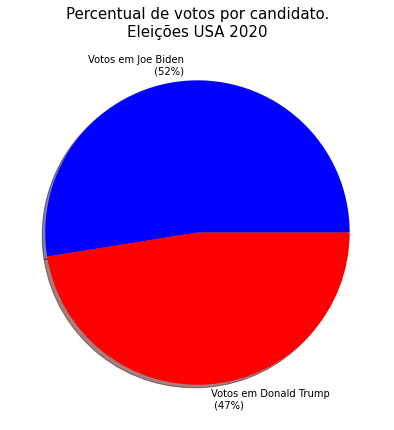

In [ ]:
# Selecionando o dataframe do candidato especificado "x"
x = input('Digite o nome do candidato para saber mais: ')
candidato_x = df_presidentes[df_presidentes['candidate'] == x]
candidato_y = df_presidentes[df_presidentes['candidate'] != x]
y = (str(candidato_y['candidate'].unique())[1:-1]).strip('"\'')
# Criando novas variáveis para simplificar a escrita do código
won = candidato_x['won'].value_counts()
party = candidato_x['party'].unique()

# Razão entre votos obtidos pelo candidato e votos totais.
total_votos = sum(df_presidentes['total_votes'])
percentual_x = ((sum(candidato_x['total_votes']))*100//total_votos)
percentual_y = ((sum(candidato_y['total_votes']))*100//total_votos)
percentuais = [percentual_x, percentual_y]
legend = ['Votos em {}\n ({}%)'.format(x, percentual_x), 'Votos em {}\n ({}%)'.format(y, percentual_y)]


#Verificar se "x" está dentro de "df_presidentes" ou não
if x not in df_presidentes['candidate'].unique():
    print("Verifique o nome indicado e tente novamente.")
else:
    resumo_cand = print("{}, candidato do partido {}.\nRecebeu {} votos, representando {:.2f}% do total.\nGanhou em {} condados e perdeu em outros {}.".format(x,party, sum(candidato_x['total_votes']),percentual_x,won[1], won[0]))
    fig = plt.figure(figsize=(10, 7))
    plt.pie(percentuais, labels=legend, colors=('blue', 'red'), shadow=True)
    plt.title('Percentual de votos por candidato.\n' + 'Eleições USA 2020', fontsize = 15)
    plt.show()

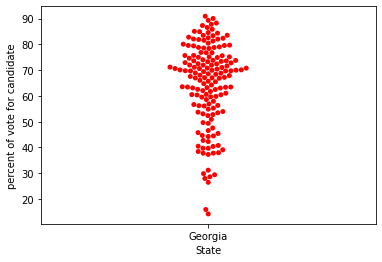

In [ ]:
# GRÁFICOS
_ = sns.swarmplot(x='State', y='Share_of_votes(%)', data=df_presidentes[(df_presidentes['party']== 'REP') & (df_presidentes['State']=='Georgia')],color='red')
_ = plt.xlabel('State')
_ = plt.ylabel('percent of vote for candidate')
plt.show()

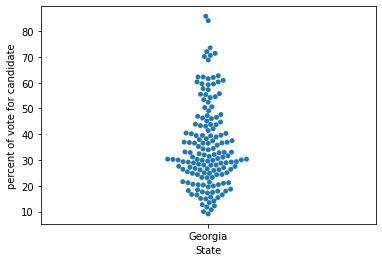

In [ ]:
_ = sns.swarmplot(x='State', y='Share_of_votes(%)', data=df_presidentes[(df_presidentes['party']== 'DEM') & (df_presidentes['State']=='Georgia')])
_ = plt.xlabel('State')
_ = plt.ylabel('percent of vote for candidate')
plt.show()

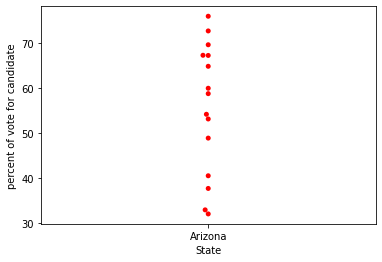

In [ ]:
_ = sns.swarmplot(x='State', y='Share_of_votes(%)', data=df_presidentes[(df_presidentes['party']== 'REP') & (df_presidentes['State']=='Arizona')],color='red')
_ = plt.xlabel('State')
_ = plt.ylabel('percent of vote for candidate')
plt.show()


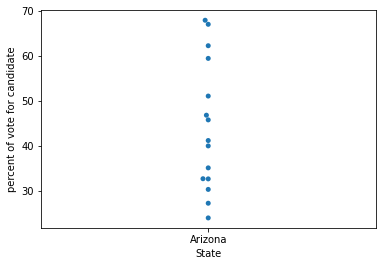

In [ ]:
_ = sns.swarmplot(x='State', y='Share_of_votes(%)', data=df_presidentes[(df_presidentes['party']== 'DEM') & (df_presidentes['State']=='Arizona')])
_ = plt.xlabel('State')
_ = plt.ylabel('percent of vote for candidate')
plt.show()

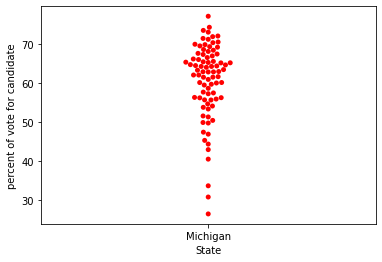

In [ ]:
_ = sns.swarmplot(x='State', y='Share_of_votes(%)', data=df_presidentes[(df_presidentes['party']== 'REP') & (df_presidentes['State']=='Michigan')],color= 'red')
_ = plt.xlabel('State')
_ = plt.ylabel('percent of vote for candidate')
plt.show()

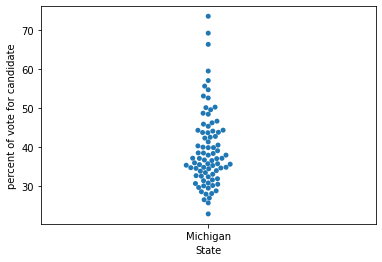

In [ ]:
_ = sns.swarmplot(x='State', y='Share_of_votes(%)', data=df_presidentes[(df_presidentes['party']== 'DEM') & (df_presidentes['State']=='Michigan')])
_ = plt.xlabel('State')
_ = plt.ylabel('percent of vote for candidate')
plt.show()

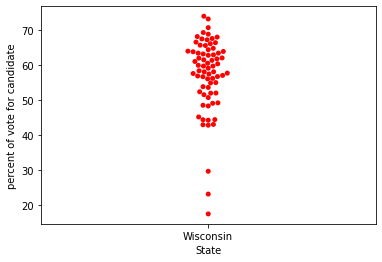

In [ ]:
_ = sns.swarmplot(x='State', y='Share_of_votes(%)', data=df_presidentes[(df_presidentes['party']== 'REP') & (df_presidentes['State']=='Wisconsin')],color= 'red')
_ = plt.xlabel('State')
_ = plt.ylabel('percent of vote for candidate')
plt.show()

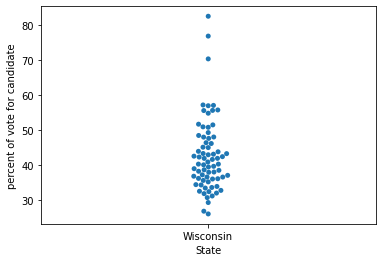

In [ ]:
_ = sns.swarmplot(x='State', y='Share_of_votes(%)', data=df_presidentes[(df_presidentes['party']== 'DEM') & (df_presidentes['State']=='Wisconsin')])
_ = plt.xlabel('State')
_ = plt.ylabel('percent of vote for candidate')

plt.show()

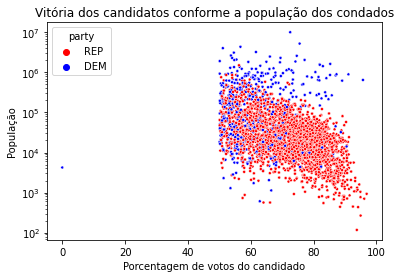

In [ ]:
_ = sns.scatterplot(data=df_merged,y = 'TotalPop',x = 'Share_of_votes(%)',hue='party' ,marker='.', palette = ['red','blue'])
_.set(yscale ='log')
_ = plt.ylabel('População')
_ = plt.xlabel('Porcentagem de votos do candidado')
_ = plt.title('Vitória dos candidatos conforme a população dos condados')


In [ ]:
candidatos_votos = df_presidentes.groupby('candidate')['total_votes'].sum()
candidatos_votos
candidatos_votos = pd.DataFrame(data=candidatos_votos)
candidatos_votos = candidatos_votos.reset_index()
candidatos_votos = candidatos_votos.sort_values('total_votes', ascending = False)

In [ ]:
#Bar plot
sns.set_theme(style="whitegrid")
_ = sns.barplot(x="candidate", y="total_votes", data = candidatos_votos.iloc[0:5,:],palette = ['blue','red','yellow','green','black'])
_.set(yscale ='log')
_ = plt.ylabel('Quantidade de Votos')
_ = plt.xlabel('Candidatos')
_ = plt.title('Votos totais por candidato')


In [ ]:
#Scatterplot renda x % de votos
_ = sns.scatterplot(data=df_merged,y = 'IncomePerCap',x = 'Share_of_votes(%)',hue='party' ,marker='.', palette = ['red','blue'])
_ = plt.ylabel('Renda per capta do condado')
_ = plt.xlabel('Porcentagem de votos do candidado')
_ = plt.title('Vitória dos candidatos conforme a renda per capta')

In [ ]:
#Mapeando as coordenadas para os distritos eleitorais
df_condados = pd.read_csv('2019_Gaz_counties_national_2.csv')

df_mapa = pd.read_csv('countypres_2000-2016.csv')
df_mapa = df_mapa[['state', 'state_po', 'county', 'FIPS']]
df_mapa = df_mapa.drop_duplicates()
df_mapa.rename(columns={'state':'State','county':'County'}, inplace = True)

fips = list(df_condados['GEOID'])
geolocal = list(df_condados[['INTPTLAT', 'INTPTLONG']].to_records(index=False))

dict_coordenadas = dict(zip(fips, geolocal))

df_mapa['FIPS'].replace(dict_coordenadas, inplace=True)

droplist = [i for i in df_mapa['FIPS'] if type(i) != tuple]
df_mapa2 = df_mapa.query('FIPS not in @droplist')

df_mapa2['County'].replace({'District 13':'ED 13', 'District 16':'ED 16', 'District 20':'ED 20'}, inplace=True)

df_county_coord = pd.merge(df_vencedor_condado, df_mapa2, on=['State', 'County'])
df_county_coord['Lat'] = [i[0] for i in df_county_coord['FIPS']]
df_county_coord['Lon'] = [i[1] for i in df_county_coord['FIPS']]
df_county_coord = df_county_coord[['party', 'total_votes', 'Lat', 'Lon']]

print(dict_coordenadas)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4581: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


{1001: (32.532237, -86.64644), 1003: (30.659218, -87.746067), 1005: (31.870253, -85.405104), 1007: (33.015893, -87.127148), 1009: (33.977358, -86.56644), 1011: (32.101759, -85.717261), 1013: (31.751667, -86.681969), 1015: (33.770516, -85.827909), 1017: (32.915504, -85.394032), 1019: (34.069515, -85.654242), 1021: (32.854051, -86.726607), 1023: (31.990954, -88.248889), 1025: (31.685521, -87.818624), 1027: (33.2704, -85.863525), 1029: (33.671964, -85.516126), 1031: (31.402258, -85.989602), 1033: (34.703112, -87.801457), 1035: (31.430926, -86.988722), 1037: (32.931445, -86.243482), 1039: (31.243987, -86.448721), 1041: (31.732826, -86.319222), 1043: (34.131923, -86.869267), 1045: (31.430654, -85.609476), 1047: (32.33354, -87.114356), 1049: (34.460929, -85.803992), 1051: (32.597229, -86.142735), 1053: (31.122287, -87.16841), 1055: (34.047641, -86.034263), 1057: (33.716157, -87.764292), 1059: (34.441989, -87.842814), 1061: (31.092382, -85.821022), 1063: (32.844497, -87.9642), 1065: (32.75279

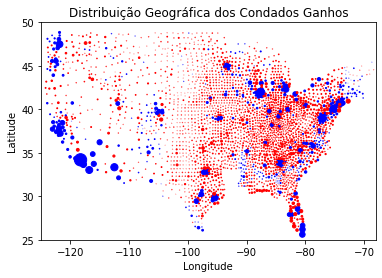

In [ ]:
#Mapa
#mapa_usa = gpd.read_file('cb_2018_us_state_20m.shp')
dict_cor = {'REP':'red', 'DEM':'blue'}

#mapa_usa.plot()
plt.scatter(df_county_coord.Lon, df_county_coord.Lat, c=df_county_coord['party'].apply(lambda x: dict_cor[x]), s=df_county_coord['total_votes']/20000)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribuição Geográfica dos Condados Ganhos')
plt.ylim([25, 50])
plt.xlim([-125, -68])
plt.show()